# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(0,100,(10,10))
print(A)
print(A.shape)

[[51 28 79 86  4  5 67 58 84 77]
 [ 6 51 74 91 92 10 62  1 88 97]
 [83 66 84  0 29 42 58 33  0 72]
 [25 95  1 74 15 52 20 17 76 20]
 [69 26  6 50 28 40 67 99 79 53]
 [94 79  3 37 13 73 16 18 14 60]
 [50 93 30 38 49 97 47 23 44 68]
 [91  6 75 80 77 97 86 47 25 57]
 [61  1 66  2  8 97 96 24  5 38]
 [79 35 80  0 55 57 82  0 12 79]]
(10, 10)


In [3]:
# Посчитайте средние значения в матрице по столбцам

A.mean(axis=0)

array([60.9, 48. , 49.8, 45.8, 37. , 57. , 60.1, 32. , 42.7, 62.1])

In [4]:
# Транспонируйте матрицу A

A.T

array([[51,  6, 83, 25, 69, 94, 50, 91, 61, 79],
       [28, 51, 66, 95, 26, 79, 93,  6,  1, 35],
       [79, 74, 84,  1,  6,  3, 30, 75, 66, 80],
       [86, 91,  0, 74, 50, 37, 38, 80,  2,  0],
       [ 4, 92, 29, 15, 28, 13, 49, 77,  8, 55],
       [ 5, 10, 42, 52, 40, 73, 97, 97, 97, 57],
       [67, 62, 58, 20, 67, 16, 47, 86, 96, 82],
       [58,  1, 33, 17, 99, 18, 23, 47, 24,  0],
       [84, 88,  0, 76, 79, 14, 44, 25,  5, 12],
       [77, 97, 72, 20, 53, 60, 68, 57, 38, 79]])

In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

array([[2601,  168, 6557, 2150,  276,  470, 3350, 5278, 5124, 6083],
       [ 168, 2601, 4884, 8645, 2392,  790, 5766,    6,   88, 3395],
       [6557, 4884, 7056,    0,  174,  126, 1740, 2475,    0, 5760],
       [2150, 8645,    0, 5476,  750, 1924,  760, 1360,  152,    0],
       [ 276, 2392,  174,  750,  784,  520, 3283, 7623,  632, 2915],
       [ 470,  790,  126, 1924,  520, 5329, 1552, 1746, 1358, 3420],
       [3350, 5766, 1740,  760, 3283, 1552, 2209, 1978, 4224, 5576],
       [5278,    6, 2475, 1360, 7623, 1746, 1978, 2209,  600,    0],
       [5124,   88,    0,  152,  632, 1358, 4224,  600,   25,  456],
       [6083, 3395, 5760,    0, 2915, 3420, 5576,    0,  456, 6241]])

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = A @ A
print(B)

[[32057 26097 30926 21037 19194 33512 34318 13824 19412 31700]
 [32539 28735 26640 19473 20087 32966 35402 17261 23673 33313]
 [29141 23418 28772 20992 19541 21760 28608 14164 19900 34411]
 [18464 19877 17900 21217 15072 21462 22278  8340 19922 23404]
 [32480 21051 27106 25504 19349 34283 33692 16658 21110 30539]
 [22233 20189 21412 23438 15181 17235 22713 10410 21653 28312]
 [31546 27603 25454 25328 20995 28391 30438 14444 24180 35759]
 [41938 35369 27081 28809 18876 36561 34288 23275 27461 38470]
 [28606 24583 18828 15052 12447 24883 20277 11745 12659 26918]
 [31105 25613 25624 17978 16596 24087 28184 15902 19475 33846]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [8]:
train_size = 0.2
ind = int(all_data.shape[0] * train_size)
delayed_data = all_data[:ind]
all_data = all_data[ind:]


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [9]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [11]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [12]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix,two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [13]:
lr_clf = LogisticRegression(solver='liblinear')

In [14]:
lr_clf.fit(train_feature_matrix,train_labels)
print('Accuracy score:',accuracy_score(test_labels,lr_clf.predict(test_feature_matrix)))
print('F1 score:',f1_score(test_labels,lr_clf.predict(test_feature_matrix)))

Accuracy score: 0.766218585622443
F1 score: 0.7241379310344828


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [15]:
from sklearn.preprocessing import StandardScaler

lr_clf = LogisticRegression(multi_class='multinomial',max_iter=1000, tol=0.001)

X_train, X_test, y_train, y_test = train_test_split(feature_matrix,labels,test_size=0.2,random_state=42)
sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.transform(X_test)


C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.linspace(0.01, 1, 10),
    'solver': ['sag','saga']
}
grid = GridSearchCV(lr_clf,param_grid,cv=5, scoring='accuracy')
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'solver': ['sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
grid.cv_results_

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\

{'mean_fit_time': array([0.30520616, 0.62974477, 1.30911803, 2.46103954, 1.58996487,
        3.03270788, 2.06807632, 4.15378542, 2.53584785, 4.28566599,
        2.57043891, 4.44663773, 2.63776159, 4.40622492, 2.77449212,
        4.47888694, 2.88131804, 4.80159135, 2.86545377, 4.4515563 ]),
 'std_fit_time': array([0.01936173, 0.00686917, 0.08476519, 0.20052776, 0.04929639,
        0.18686127, 0.21420561, 0.19654832, 0.17339421, 0.20927977,
        0.1386057 , 0.14614363, 0.07898342, 0.1092777 , 0.1191291 ,
        0.16570622, 0.16537461, 0.40093067, 0.10197097, 0.14788092]),
 'mean_score_time': array([0.00119619, 0.00039225, 0.00079064, 0.00039258, 0.00058703,
        0.0007937 , 0.00099368, 0.00078878, 0.00021453, 0.00059767,
        0.00039148, 0.00058398, 0.00059819, 0.00115781, 0.00039749,
        0.00098763, 0.00079765, 0.00079026, 0.00059414, 0.00058827]),
 'std_score_time': array([1.93370849e-03, 4.80456099e-04, 7.42231468e-04, 4.80885856e-04,
        4.79441052e-04, 3.97047187e-

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

[0.7065625  0.70671875 0.7115625  0.71171875 0.71328125 0.7125
 0.71375    0.71375    0.71453125 0.7134375  0.71515625 0.71359375
 0.71484375 0.71390625 0.715      0.71453125 0.71515625 0.7146875
 0.715      0.7146875 ]
[0.70671875 0.71171875 0.7125     0.71375    0.7134375  0.71359375
 0.71390625 0.71453125 0.7146875  0.7146875 ]
[0.7065625  0.7115625  0.71328125 0.71375    0.71453125 0.71515625
 0.71484375 0.715      0.71515625 0.715     ]


Text(0.5, 1.0, 'accuracy score with L2 regularization')

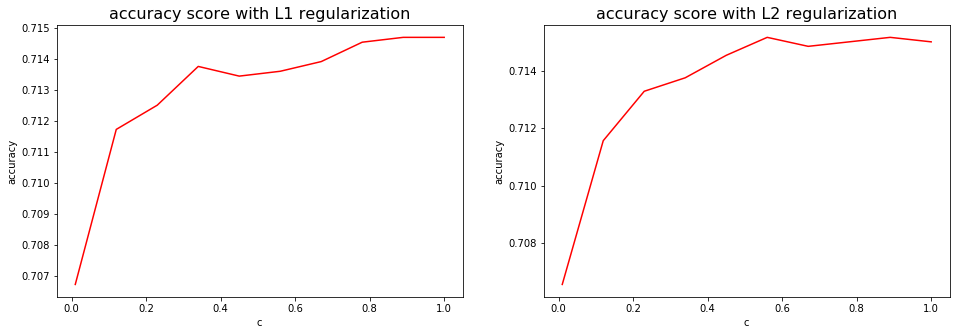

In [19]:
import matplotlib.pyplot as plt

x_c = np.linspace(0.01, 1, 10)
print(grid.cv_results_['mean_test_score'])
y_l1 = grid.cv_results_['mean_test_score'][1::2]
y_l2 = grid.cv_results_['mean_test_score'][::2]
print(y_l1)
print(y_l2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(x_c, y_l1, 'r')
axes[0].set_xlabel('c')
axes[0].set_ylabel('accuracy')
axes[0].set_title(f'accuracy score with L1 regularization', fontsize=16)
axes[1].plot(x_c, y_l2, 'r')
axes[1].set_xlabel('c')
axes[1].set_ylabel('accuracy')
axes[1].set_title(f'accuracy score with L2 regularization', fontsize=16)

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [22]:
# Видим, что при увеличении коэффициента регуляризации увеличивается средняя точность на тестовой выборке
print(grid.best_estimator_.C)
print(grid.best_estimator_.solver)

0.56
sag


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [23]:
#grid.best_estimator_.fit(X_train_scaled,y_train)
best_estim = LogisticRegression(multi_class='multinomial',max_iter=1000, tol=0.001,solver=grid.best_estimator_.solver,C=grid.best_estimator_.C)
best_estim.fit(X_train_scaled,y_train)
probs_matrix = best_estim.predict_proba(X_test_scaled)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [24]:
print(probs_matrix.mean(axis=0))
print(np.unique(y_train, return_counts=True)[1]/X_train.shape[0])

[0.35960571 0.48796319 0.06603779 0.00564878 0.01812216 0.03216734
 0.03045503]
[0.37046875 0.48671875 0.05796875 0.004375   0.01765625 0.0296875
 0.033125  ]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clsfr = KNeighborsClassifier()

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [27]:
param_grid_knn = {
    'n_neighbors': np.arange(1,11),
    'weights': ['uniform','distance']
}
grid_knn = GridSearchCV(knn_clsfr,param_grid_knn,cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Text(0.5, 1.0, "Accuracy with distance param 'uniform'")

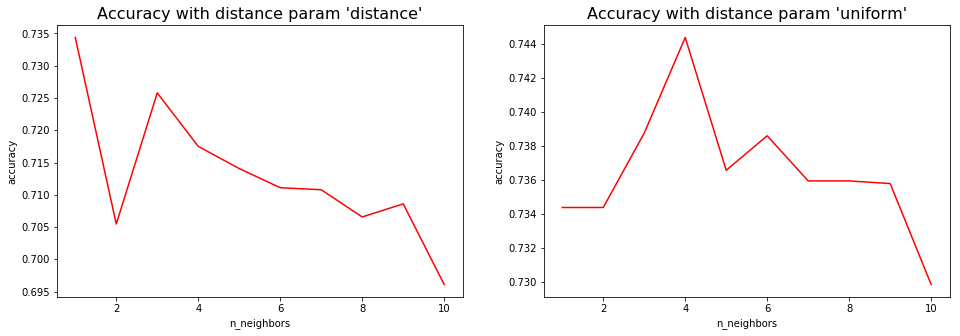

In [28]:
x_knn = np.arange(1,11)
y_dist = grid_knn.cv_results_['mean_test_score'][::2]
y_uni = grid_knn.cv_results_['mean_test_score'][1::2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(x_knn, y_dist, 'r')
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('accuracy')
axes[0].set_title(f"Accuracy with distance param 'distance'", fontsize=16)
axes[1].plot(x_knn, y_uni, 'r')
axes[1].set_xlabel('n_neighbors')
axes[1].set_ylabel('accuracy')
axes[1].set_title(f"Accuracy with distance param 'uniform'", fontsize=16)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [29]:
knn_best = KNeighborsClassifier(n_neighbors=grid_knn.best_estimator_.n_neighbors,weights=grid_knn.best_estimator_.weights)
knn_best.fit(X_train_scaled,y_train)
print(knn_best.predict_proba(X_test_scaled))

[[0.29596422 0.70403578 0.         ... 0.         0.         0.        ]
 [0.23314705 0.         0.         ... 0.         0.         0.76685295]
 [0.         0.92859073 0.         ... 0.         0.07140927 0.        ]
 ...
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.24610659 0.75389341 0.         ... 0.         0.         0.        ]
 [0.85899162 0.14100838 0.         ... 0.         0.         0.        ]]


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [30]:
y_delayed = delayed_data[delayed_data.columns[-1]].values
X_delayed = delayed_data[delayed_data.columns[:-1]].values
#print(y_delayed)
#print(X_delayed)
print('KNN prediction:',accuracy_score(y_delayed,knn_best.predict(sclr.transform(X_delayed))))
print('Logreg prediction:',accuracy_score(y_delayed,best_estim.predict(sclr.transform(X_delayed))))

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


KNN prediction: 0.7345
Logreg prediction: 0.725


C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Как видим, метод ближайшего соседа в данном случае сработал лучше.